### AMAZON REVIEWS ANALYSIS

#### LOADING DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_csv('amazon_reviews.csv')

org=df.copy()
df.head(3)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5b3f809c-27c4-4ba7-a6cf-eb650e8e7a29,George Springate,brilliant,5,0,30.11.0.100,2025-06-17 13:22:25,30.11.0.100
1,0ff79ba4-c1eb-4e9e-b885-c48bcb145cb2,Steven Crawford,Hate the Rufus. wish there was a way to disabl...,1,0,30.11.0.100,2025-06-17 12:57:48,30.11.0.100
2,f8571526-57e6-4651-b0ba-e7cac2eb99c1,mahmod ibrahim,يتم قبول او الغاء الاوردرات بناء علي مزاج موظف...,1,0,30.11.0.100,2025-06-17 12:28:28,30.11.0.100


np.float64(231.0)

#### HANDLING MISSING DATA

In [5]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
reviewId,0
userName,5
content,6
score,0
thumbsUpCount,0
reviewCreatedVersion,8406
at,0
appVersion,8406


In [113]:
df[["userName","content"]][df.userName.isnull() | df.content.isnull()]

,userName,content
533,David Chibitty,NaN
5514,Ailsa Rattray,NaN
16749,Martinez leah vlog,NaN
16972,Donquel Afonso,NaN
23599,Amir Louis,NaN
24185,Steeve Roy,NaN
31618,NaN,They wanted my license plate number and what s...
40221,NaN,It seemed to work okay until about a week ago....
49966,NaN,Search doesn't work. lists things you don't wa...
50391,NaN,Nightmare service. Try calling support. You'll...


In [116]:
df.dropna(subset=['userName'],inplace=True)
number_of_empty_userName_null_rows_dropped=org.shape[0]-df.shape[0]
number_of_empty_userName_null_rows_dropped

5

In [121]:
df.content.fillna('no review',inplace=True)

number_of_empty_contents_filled=org.content.isnull().sum()-df.content.isnull().sum()
number_of_empty_contents_filled

np.int64(6)

In [114]:
df.isnull().sum()

,0
reviewId,0
userName,5
content,6
score,0
thumbsUpCount,0
reviewCreatedVersion,8406
at,0
appVersion,8406


In [138]:
k=df.groupby('reviewId')['reviewId'].count()
k.values.all()
k.head(3)

,reviewId
reviewId,
000031ec-e175-43a0-95a8-dea42ae2f62f,1
00017d3c-da5a-499f-bbd3-62b2d1aa60cd,1
0001fc0c-4a1e-47d8-ab47-adb8d3f7575d,1


there are values whose review ids are repeating

In [139]:

for i,j in k.items():
  if j!=1:
    print(i,j)


some ids are repeating 2, 3 times


In [132]:
org[org.reviewId=='3f35aa48-3afa-423f-8076-bc0a635ad82b']

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
942,3f35aa48-3afa-423f-8076-bc0a635ad82b,Nathan Mathews,"Amazon used to be great, but lately they're sh...",1,4,30.10.0.100,2025-05-27 00:00:16,30.10.0.100
5803,3f35aa48-3afa-423f-8076-bc0a635ad82b,Nathan Mathews,"Amazon used to be great, but lately they're sh...",1,0,30.2.0.100,2025-02-02 05:51:02,30.2.0.100


as the reviews are repeating i feel like they are updated reviews so i would like to keep the latest reviews and drop the previous reviews

In [140]:

df.drop_duplicates(subset='reviewId',keep='first',inplace=True)

In [92]:
df[df.reviewId=='3f35aa48-3afa-423f-8076-bc0a635ad82b']

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
942,3f35aa48-3afa-423f-8076-bc0a635ad82b,Nathan Mathews,"Amazon used to be great, but lately they're sh...",1,4,30.10.0.100,2025-05-27 00:00:16,30.10.0.100


Most recently updated versions are visible

In [141]:
k=df.groupby('reviewId')['reviewId'].count()
k.values.all()
k.head(3)
flag=0
for i,j in k.items():
  if j!=1:
    flag=1
    print("Duplicates")
    break
  else:
    flag=0
if flag==0:
  print("No Duplicates")


No Duplicates


Yeah! There are no duplicates

#### FEATURE ENGINEERING

In [146]:
df['customer_satisfied']=df.score>=3
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,customer_satisfied
0,5b3f809c-27c4-4ba7-a6cf-eb650e8e7a29,George Springate,brilliant,5,0,30.11.0.100,2025-06-17 13:22:25,30.11.0.100,True
1,0ff79ba4-c1eb-4e9e-b885-c48bcb145cb2,Steven Crawford,Hate the Rufus. wish there was a way to disabl...,1,0,30.11.0.100,2025-06-17 12:57:48,30.11.0.100,False
2,f8571526-57e6-4651-b0ba-e7cac2eb99c1,mahmod ibrahim,يتم قبول او الغاء الاوردرات بناء علي مزاج موظف...,1,0,30.11.0.100,2025-06-17 12:28:28,30.11.0.100,False
3,f94f7b2b-b107-420d-a0a4-10e2c1722c0b,philip b,They won't let you write a review about produc...,3,0,30.11.0.100,2025-06-17 11:40:46,30.11.0.100,True
4,6ba1e7bc-70fc-4537-b846-ce01841b925d,Chadni Akther Alo,wow,5,0,NaN,2025-06-17 11:35:32,NaN,True
...,...,...,...,...,...,...,...,...,...
75106,ac82191a-e776-42a0-8e30-91eabb763968,Mary Mora,Amazon Smile donates. Make sure you get all se...,5,0,26.1.2.100,2023-01-16 06:12:14,26.1.2.100,True
75107,3aa6af38-b044-4257-9cf3-b94c437da0ef,Marie Elliott,After having problems with the app and having ...,5,1,22.18.0.100,2021-09-24 12:01:29,22.18.0.100,True
75108,727ec38a-c633-48f4-a302-66e52740a43c,Dan Preston,"Used to be great. Got greedy, they ruined the ...",1,0,26.9.0.100,2023-05-15 18:27:24,26.9.0.100,False
75109,615a9643-cd36-4010-9a81-8763bac11ddf,Jhosh,New search bar location sucks. At least give m...,2,0,26.12.0.100,2023-06-11 15:24:08,26.12.0.100,False


In [153]:
df[df.thumbsUpCount==df['thumbsUpCount'].max()]
df.thumbsUpCount.quantile(0.99)

np.float64(231.0)

In [154]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion', 'customer_satisfied'],
      dtype='object')

In [157]:
df.appVersion.unique()

array(['30.11.0.100', nan, '30.10.0.100', '28.23.2.100', '16.21.0.100',
       '30.8.0.100', '28.16.0.100', '28.21.6.100', '30.6.0.100',
       '26.19.2.100', '30.4.0.100', '28.9.2.100', '30.5.0.100',
       '24.22.0.100', '30.1.0.100', '28.21.4.100', '28.5.2.100',
       '30.7.0.100', '28.17.0.100', '30.9.0.100', '24.12.6.100',
       '28.6.0.100', '28.20.2.100', '24.3.0.100', '20.1.0.100',
       '30.3.0.100', '22.2.0.100', '24.15.2.100', '28.14.2.100',
       '10.9.0.100', '28.11.1.100', '16.02.0.100', '24.11.0.100',
       '28.18.0.100', '22.4.0.100', '24.21.4.100', '24.19.0.100',
       '28.13.6.100', '24.4.0.100', '22.19.0.100', '26.17.2.100',
       '26.2.0.100', '30.2.0.100', '22.20.0.100', '26.15.0.100',
       '28.7.0.100', '28.12.2.100', '26.23.4.100', '24.16.2.100',
       '24.17.0.100', '26.9.0.100', '24.2.0.100', '20.18.0.100',
       '28.18.4.100', '24.13.0.100', '28.10.0.100', '24.8.0.100',
       '20.15.0.100', '20.22.2.100', '26.4.0.100', '20.20.0.100',
       '22.6.0

#### VISUALISATION

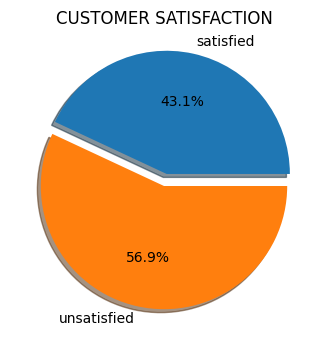

In [255]:

sat=df[df['score']>=3].shape[0]
unsat=df.shape[0]-sat

plt.figure(figsize=(12,4))
plt.title("CUSTOMER SATISFACTION")

plt.pie([sat,unsat],labels=['satisfied','unsatisfied'],autopct='%1.1f%%',shadow=True,explode=(0.1,0))
plt.show()

In [176]:
df.score.max()

5

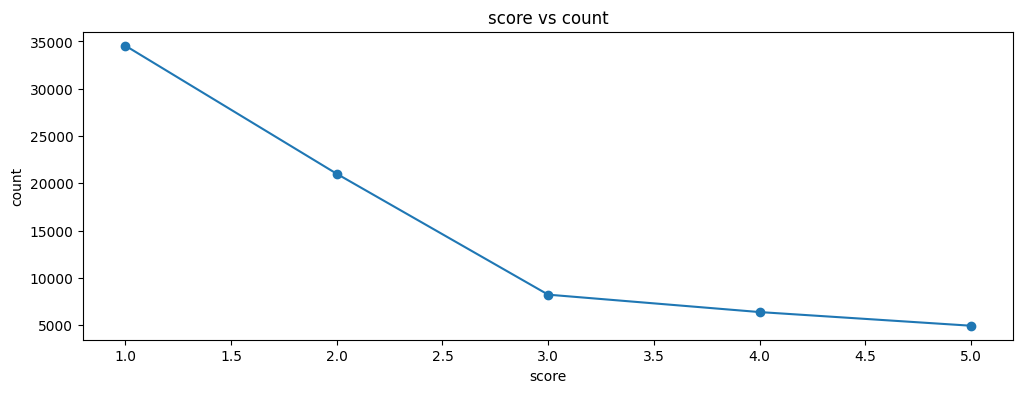

In [250]:

plt.figure(figsize=(12,4))
plt.plot([1,2,3,4,5],df.score.value_counts(),marker='o',)
plt.title("score vs count")
plt.xlabel("score")
plt.ylabel("count")
plt.show()

#### CHURN ANALYSIS

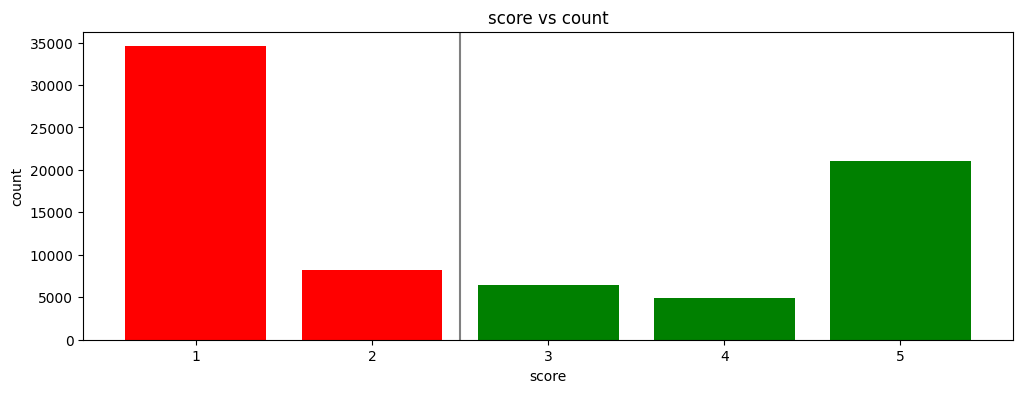

In [245]:
plt.figure(figsize=(12,4))
score_count=df.groupby('score')['score'].count()
plt.title("Churning Customers Based on Score")
colors=['red' if i<3  else 'green' for i in score_count.index ]

plt.bar(score_count.index,score_count.values,color=colors)

plt.axvline(x=2.5,color='gray')
plt.title("score vs count")
plt.xlabel("score")
plt.ylabel("count")
plt.show()